In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def UCB1(k, steps, runs, true_values, c):
    avg = np.zeros([steps])
    opt = np.zeros([steps])
    
    opt_arms = np.argmax(true_values,axis = 1)
    print(c)
    for i in range(runs):   
        '''
        Expected rewards of each arm. Each arm has a value and the number of times it has been pulled.
        ''' 
        Q = np.zeros([k])
        N = np.zeros([k])
        
        '''
        Pull each arm once
        '''      
        
        for j in range(steps):
            
            if j < k:
                reward = np.random.normal(true_values[i][j], 1)
                N[j] += 1
                Q[j] = Q[j] + (reward - Q[j])/N[j]
                
                if opt_arms[i] == j:
                    opt[j]+=1
                
                
            else:
                '''
                Selecting the arm which has highest upper confidence bound
                '''
                upper_bounds = Q + np.sqrt(c*np.log(j)/N)

                max_arm = np.argmax(upper_bounds)
                reward = np.random.normal(true_values[i][max_arm],1)

                N[max_arm] += 1
                Q[max_arm] = Q[max_arm] + (reward - Q[max_arm])/N[max_arm]         

                if opt_arms[i] == max_arm:
                    opt[j]+=1

            avg[j] += reward
               

    avg = np.divide(avg, runs)
    opt = np.divide(opt, runs/100)
        
    return avg, opt
    
    

In [ ]:
def plot_all(avg_reward, opt_arm, C):


    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)



    colors = ['r', 'g', 'k', 'b', 'y','m', 'c']
    for i in range(len(avg_reward)):
        fig1.plot(range(steps), avg_reward[i], colors[i], label = "c = " + str(C[i]) )

    for i in range(len(opt_arm)):
        fig2.plot(range(steps), opt_arm[i], colors[i], label = "c = " + str(C[i]) )

    fig1.title.set_text('UCB1 : Average Reward Vs Steps for 10 arms')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('Steps')
#     fig1.set_ylim(0,1.6)
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig2.title.set_text('UCB1 : $\%$ Optimal Action Vs Steps for 10 arms')
    fig2.set_ylabel('$\%$ Optimal Action')
    fig2.set_xlabel('Steps')
    fig2.set_ylim(0,100)
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig1 = fig1.get_figure()
    fig2 = fig2.get_figure()

    plt.show()


In [ ]:
if __name__ == '__main__':
    steps = 1000
    runs = 2000
    k = 10
    mean = 0
    std_dev = 1
    C = [0.1, 2, 5]

    true_values = np.random.normal(mean, std_dev, (runs, k))
    
    avg_reward = []
    opt_arm = []
    
    for i in range(len(C)):
        avg, opt = UCB1(k, steps, runs, true_values, C[i])
        avg_reward.append(avg)
        opt_arm.append(opt)
    
    plot_all(avg_reward, opt_arm, C)

In [29]:
if __name__ == '__main__':
    steps = 10000
    runs = 2000
    k = 1000
    mean = 0
    std_dev = 1
    C = [0.1, 2, 5]

    true_values = np.random.normal(mean, std_dev, (runs, k))
    
    avg_reward = []
    opt_arm = []
    
    for i in range(len(C)):
        avg, opt = UCB1(k, steps, runs, true_values, C[i])
        avg_reward.append(avg)
        opt_arm.append(opt)
    
    plot_all(avg_reward, opt_arm, C)

0.1


KeyboardInterrupt: 

In [27]:
from pb1 import Epsilon_greedy
from pb2 import Softmax

def compare_all(k, steps, runs, true_values, epsilon, temparature, c):
    
    avg_epsilon, opt_eps= Epsilon_greedy(k, epsilon, steps, runs, true_values)
    avg_ucb1, opt_ucb1 =  UCB1(k, steps, runs, true_values, c)
    avg_softmax, opt_sof = Softmax(k, steps, runs, true_values, temparature)
    
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)
    
    fig1.plot(range(steps), avg_epsilon, 'r', label = "Epsilon-greedy: $\epsilon$ = " + str(epsilon) )
    fig1.plot(range(steps), avg_softmax, 'k', label = "Softmax: T = " + str(temparature))
    fig1.plot(range(steps), avg_ucb1, 'g', label = "UCB1: c = " + str(c))
    
    fig2.plot(range(steps), opt_eps, 'r', label = "Epsilon-greedy: $\epsilon$ = " + str(epsilon) )
    fig2.plot(range(steps), opt_sof, 'k', label = "Softmax: T = " + str(temparature))
    fig2.plot(range(steps), opt_ucb1, 'g', label = "UCB1: c = " + str(c))
#     print(opt_ucb1[999])
    
    fig1.title.set_text(' Average reward comparition between Epsilon greedy, Softmax, UCB1')
    fig1.set_xlabel('Steps', fontsize = 15)
    fig1.set_ylabel('Average reward', fontsize = 15)
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    fig2.title.set_text('$\%$ Optimal action comparition between Epsilon greedy, Softmax, UCB1')
    fig2.set_xlabel('Steps', fontsize = 15)
    fig2.set_ylabel('$\%$ Optimal Action', fontsize = 15)
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
#     plt.ylim(-0.2, 1.6)


    plt.show()
    
    

2
0.1
90.7


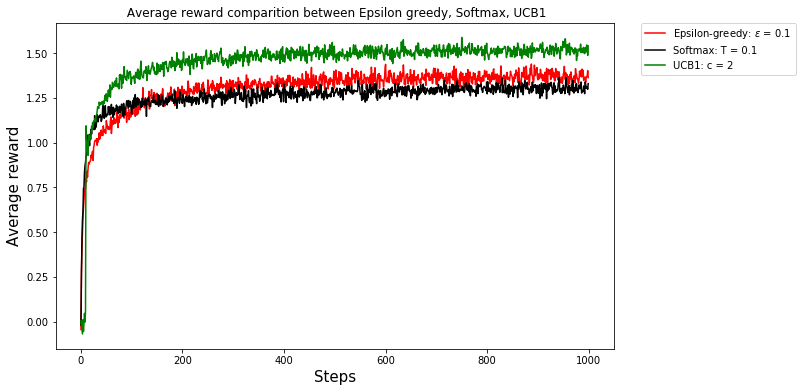

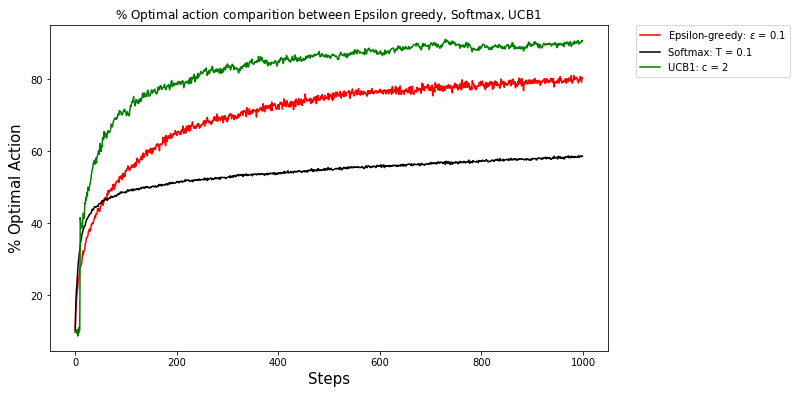

In [28]:
if __name__ == '__main__':
    
    k = 10
    steps = 1000
    runs = 2000

    mean = 0
    std_dev = 1
    true_values = np.random.normal(mean, std_dev, (runs, k))

    epsilon = 0.1
    temparature = 0.1
    c = 2
    
    compare_all(k, steps, runs, true_values, epsilon, temparature, c)

In [ ]:
def UCB(k, steps, runs, true_values, c):
    avg = np.zeros([steps])
    opt = np.zeros([steps])
    
    opt_arms = np.argmax(true_values,axis = 1)
    print(c)
    for i in range(runs):   
        '''
        Expected rewards of each arm. Each arm has a value and the number of times it has been pulled.
        ''' 
        Q = np.zeros([k])
        N = np.zeros([k])
        
        '''
        Pull each arm once
        '''      
        for l in range(1):
            Q += np.random.normal(true_values[i],1)/1
        
        
        for j in range(2, steps+2):
            '''
            Selecting the arm which has highest upper confidence bound
            '''
            upper_bounds = Q + np.sqrt(c*np.log(j)/N)

            max_arm = np.argmax(upper_bounds)
            reward = np.random.normal(true_values[i][max_arm],1)
            
            N[max_arm] += 1
            Q[max_arm] = Q[max_arm] + (reward - Q[max_arm])/N[max_arm]         

            if opt_arms[i] == max_arm:
                opt[j-2]+=1

        
            avg[j-2] += reward
            if j==2 :
                avg[j-2] = 0
            

    avg = np.divide(avg, runs)
    opt = np.divide(opt, runs/100)
        
    return avg, opt
    
    

In [ ]:
def plot_fig(avg, opt):
    
    fig1=plt.figure()
    fig2=plt.figure()

    fig1 = fig1.add_axes([0.1, 0.1, 0.6, 0.75])
    fig2 = fig2.add_axes([0.1, 0.1, 0.6, 0.75])

    x = np.zeros([len(avg)])
    for i in range(1,steps+1):
        x[i-1] = i

    fig1.plot(x, avg, 'r')

    fig2.plot(x, opt, 'b')

    fig1.title.set_text('UCB1 : Average Reward Vs Steps for 10 arms')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('Steps')
    fig1.set_ylim(-0.5,1.6)
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig2.title.set_text('UCB1 : $\%$ Optimal Action Vs Steps for 10 arms')
    fig2.set_ylabel(r'$\%$ Optimal Action')
    fig2.set_xlabel('Steps')
    fig2.set_ylim(0,100)
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig1 = fig1.get_figure()
    fig2 = fig2.get_figure()

    # fig1.savefig('fig1.jpg')
    # fig2.savefig('fig2.jpg')
    plt.show()